# **PENGAMBILAN DATA PTA UTM**

---

pta (portal tugas akhir) merupakan website data ta mahasiswa utm. untuk proses pengambilan menggunakan scrapy. berikut langkah - langkahnya:

**LANGKAH PERTAMA INSTALL SCRAPY.**

scrapy adalah framework python untuk melakukan web scraping dalam skala besar. scrapy menyediakan segala tools yang kita butuhkan untuk mengekstrak data dari setiap website secara efisien, memprosesnya, lalu menyimpannya dalam struktur atau format yang kita inginkan.

In [ ]:
!pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**LANGKAH SELANJUTNYA MEMBUAT SCRAPY PROJECT DENGAN NAMA CRAWLING**

In [ ]:
!scrapy startproject crawling

Error: scrapy.cfg already exists in /content/crawling


**LANGKAH SELANJUTNYA MEMILIH TEMPAT DIREKTORI**

In [ ]:
%cd /content/crawling/crawling/spiders

/content/crawling/crawling/spiders


**SELANJUTNYA MENBUAT SEBUAH SPIDER DENGAN MEMBUAT FILE PYTHON UNTUK MENGAMBIL DATA**

In [ ]:
%%writefile -a pta_spider.py
import scrapy

class QuotesSpider(scrapy.Spider):
    name = "pta_spider"

    def start_requests(self):
        x = 100000
        for i in range (1,20):
            x +=1
            urls = [
                'https://pta.trunojoyo.ac.id/welcome/detail/070411'+str(x),
            ]
            for url in urls:
                yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
      yield{
            'Abstrak':response.css('#content_journal > ul > li > div:nth-child(4) > div:nth-child(2) > p::text').extract()
        }

Appending to pta_spider.py


**KEMUDIAN EKSEKUSI DENGAN PERINTAH SCRAPY CRAWL NAMASPIDER**

In [ ]:
!scrapy crawl pta_spider

2022-11-15 13:27:14 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: crawling)
2022-11-15 13:27:14 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.0.1, Twisted 22.10.0, Python 3.7.15 (default, Oct 12 2022, 19:14:55) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.3, Platform Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
2022-11-15 13:27:14 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'crawling',
 'NEWSPIDER_MODULE': 'crawling.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['crawling.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2022-11-15 13:27:14 [asyncio] DEBUG: Using selector: EpollSelector
2022-11-15 13:27:14 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2022-11-15 13:27:14 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.un

**MENYIMPAN DATA DALAM BENTUK CSV**

In [ ]:
!scrapy runspider pta_spider.py -o pta.csv

2022-11-15 13:27:23 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: crawling)
2022-11-15 13:27:23 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.0.1, Twisted 22.10.0, Python 3.7.15 (default, Oct 12 2022, 19:14:55) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.3, Platform Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
2022-11-15 13:27:23 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'crawling',
 'NEWSPIDER_MODULE': 'crawling.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['crawling.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2022-11-15 13:27:23 [asyncio] DEBUG: Using selector: EpollSelector
2022-11-15 13:27:23 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2022-11-15 13:27:23 [scrapy.utils.log] DEBUG: Us

**MENAMPILKAN DATA HASIL CRAWLING**

In [ ]:
import pandas as pd

ta = pd.read_csv("pta.csv")
ta.dropna(inplace=True)
ta.isnull().sum()
ta

,Abstrak
4,Gerak pekerja ada pada game yang memiliki genr...
11,Senyum merupakan salah satu fitur biometrik ya...
16,Segmentasi adalah suatu proses untuk mengekstr...
18,Kabupaten Bangkalan Mempunyai jumlah penduduk ...
19,Abstrak
21,Senyum merupakan salah satu fitur biometrik ya...
25,Gerak pekerja ada pada game yang memiliki genr...
36,Segmentasi adalah suatu proses untuk mengekstr...
37,Kabupaten Bangkalan Mempunyai jumlah penduduk ...
39,Abstrak


# **CRAWLING DATA TWITTER**

---

crawling adalah semacam pengambilan data dari media sosial kemudian di kumpulkan menjadi satu untuk di evaluasi dan di bentuk agar menjadi sebuah penelitian. prosesnya cukup mudah tergantung kamu ingin mengambil data dari sosial media mana. misalkan kamu ingin crawling data dari twitter ada dua cara yaitu dengan menggunakan api dan tanpa api.

**TAHAP CRAWLING DATA TWITTER**

disini saya menggunakan twint. twint adalah sebuah tools yang digunakan untuk melakukan scrapping dari aplikasi twitter yang disetting secara khusus menggunakan bahasa pemrograman python. twint dapat kita gunakan dan jalankan tanpa harus menggunakan api dari twitter itu sendiri, dengan kapasitas scrapping data maksimalnya adalah 3200 tweet.
1. instal twint
2. import twint
3. proses ambil data twitter
4. eksport data twitter

**CLONE DATA TWITTER TANPA API DAN INSTALL TWINT**

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/crawling/crawling/spiders/twint
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/crawling/crawling/spiders/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=0b8a49f70a05031fdd6b40d4a44d825f032e2fa26ab9e45e23c688eb91779384
  Stored in directory: /tmp/pip-ephem-wheel-cache-si7oi_i1/wheels/71/e5/63/0384c3fbec4c96f10c90e427290db872020d8fe6a4a2436646
Successfully built twint
  Attempting uninstall: twint
    

**IMPORT TWINT**

In [ ]:
!pip install nest-asyncio
!pip install aiohttp==3.7.0
import nest_asyncio
nest_asyncio.apply() 
import twint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**PROSES AMBIL DATA TWITTER DENGAN TAG BBM**

In [ ]:
c = twint.Config()
c.Search = '#bbm'
c.Lang = "in"
c.Pandas = True
c.Limit = 60
twint.run.Search(c)

1592497590951903232 2022-11-15 12:39:47 +0000 <AnpBbm> Kamba Ramayanam | Yuddha Kandam 111 | by CA KM Padmanabhan | 15th Nov 2022 | #DRS #ANP #BBM #AFG  https://t.co/9YFflIlDQo
1592497589655851009 2022-11-15 12:39:47 +0000 <Bbm_anp> Kamba Ramayanam | Yuddha Kandam 111 | by CA KM Padmanabhan | 15th Nov 2022 | #DRS #ANP #BBM #AFG  https://t.co/AWCt8SrRgQ
1592493639938473985 2022-11-15 12:24:05 +0000 <ririu0607> 中日キャンプを見に行きました。 いろんなカードにサインをいただきました。 これこそコロナでなかなかできなかったカードの楽しみ方！！ #中日ドラゴンズ　#野球カード #BBM #topps  https://t.co/1uMVROoa9j
1592477932320362497 2022-11-15 11:21:40 +0000 <KoleksiKata> @alfi_indragiri #BBM #koleksikata #Pin 53AA0E16
1592467415946133504 2022-11-15 10:39:53 +0000 <carlislemikhail> Just imagine how big your tax is. Paying the corrupt and incompetent politicians and yet you are still blindly glorifying them.   #UNITY #BBM pa rin 🤦🏻‍♂️
1592462651149672449 2022-11-15 10:20:57 +0000 <thirichadi> ബ്ലാക്ക്ബെറി സർവീസ് ഒക്കെ പോസ്റ്റ് പെയ്ഡ് ബി എസ് എൻ എൽ ഉപയോഗിച്ച ഒരു കാലം .. 😎✌#bb

**MEMBUAT TABELNYA TERLEBIH DAHULU.**

In [ ]:
Tweets_df = twint.storage.panda.Tweets_df

**MENYIMPAN KE CSV**

In [ ]:
Tweets_df["tweet"].to_csv("bbm.csv",index=False)

# **TEXT PREPROCESSING**

---

proses untuk menyeleksi data text agar menjadi lebih terstruktur lagi dengan melalui serangkaian tahapan yang meliputi tahapan case folding, tokenizing, filtering dan stemming

**MENGAMBIL DAN MEMBACA DATA CSV**

menyiapkan data yang diperlukan.menggunakan file csv hasil crawling twitter yang sebelumnya disimpan. baca file tersebut menggunakan pandas. pandas adalah paket python open source yang paling sering dipakai untuk menganalisis data serta membangun sebuah machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np

tweets = pd.read_csv("/content/drive/MyDrive/webmining/bbm.csv")
tweets.head(5)

,tweet
0,Jokowi Minta Masyarakat Pakai Duit BLT BBM unt...
1,GEROMBOLAN OTAK SUNGSANG. YG KELUAR DARI CANGK...
2,Penyesuaian harga BBM bersubsidi dorong migras...
3,Penyesuaian harga BBM bersubsidi dorong migras...
4,Penyesuaian harga BBM bersubsidi dorong migras...


**CASE FOLDING**

case folding merupakan proses dalam text preprocessing yang dilakukan untuk menyeragamkan karakter pada data. proses case folding yang saya gunakan proses mengubah seluruh huruf menjadi huruf kecil (lower case)

In [ ]:
tweets['tweet'] = tweets['tweet'].str.lower()
tweets.head(5)

,tweet
0,jokowi minta masyarakat pakai duit blt bbm unt...
1,gerombolan otak sungsang. yg keluar dari cangk...
2,penyesuaian harga bbm bersubsidi dorong migras...
3,penyesuaian harga bbm bersubsidi dorong migras...
4,penyesuaian harga bbm bersubsidi dorong migras...


**REMOVE TEXT SPECIAL**

menghapus tab new line, backslice,emoticon, chinese word, .etc, mention, link, hashtag,incomplete url

In [ ]:
import re
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
    return text
tweets['tweet'] = tweets['tweet'].apply(remove_tweet_special)
tweets.head(5)

,tweet
0,jokowi minta masyarakat pakai duit blt bbm unt...
1,gerombolan otak sungsang. yg keluar dari cangk...
2,penyesuaian harga bbm bersubsidi dorong migras...
3,penyesuaian harga bbm bersubsidi dorong migras...
4,penyesuaian harga bbm bersubsidi dorong migras...


**REMOVE NUMBER**

menghapus angka jika tidak relevan dengan analisa, contohnya seperti nomor rumah, nomor telepon, dll. regular expression (regex) dapat digunakan untuk menghapus karakter angka. python memiliki modul re untuk melakukan hal – hal yang berkaitan dengan regex.

In [ ]:
def remove_number(text):
    return  re.sub(r"\d+", "", text)
tweets['tweet'] = tweets['tweet'].apply(remove_number)
tweets.head(5)

,tweet
0,jokowi minta masyarakat pakai duit blt bbm unt...
1,gerombolan otak sungsang. yg keluar dari cangk...
2,penyesuaian harga bbm bersubsidi dorong migras...
3,penyesuaian harga bbm bersubsidi dorong migras...
4,penyesuaian harga bbm bersubsidi dorong migras...


**REMOVE TANDA BACA**

tanda baca dalam kalimat tidak memiliki pengaruh pada text preprocessing. maka perlu menghapus tanda baca seperti [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]

In [ ]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
tweets['tweet'] = tweets['tweet'].apply(remove_punctuation)
tweets.head(5)

,tweet
0,jokowi minta masyarakat pakai duit blt bbm unt...
1,gerombolan otak sungsang yg keluar dari cangke...
2,penyesuaian harga bbm bersubsidi dorong migras...
3,penyesuaian harga bbm bersubsidi dorong migras...
4,penyesuaian harga bbm bersubsidi dorong migras...


**REMOVE WHITESPACE (KARAKTER KOSONG)**

untuk menghapus spasi di awal dan akhir, dapat menggunakan fungsi strip()pada pyhton

In [ ]:
def remove_whitespace_LT(text):
    return text.strip()
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)   
tweets['tweet'] = tweets['tweet'].apply(remove_whitespace_LT)
tweets['tweet'] = tweets['tweet'].apply(remove_whitespace_multiple)
tweets.head(5)

,tweet
0,jokowi minta masyarakat pakai duit blt bbm unt...
1,gerombolan otak sungsang yg keluar dari cangke...
2,penyesuaian harga bbm bersubsidi dorong migras...
3,penyesuaian harga bbm bersubsidi dorong migras...
4,penyesuaian harga bbm bersubsidi dorong migras...


**REMOVE SINGLE CHARACTER**

In [ ]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
tweets['tweet'] = tweets['tweet'].apply(remove_singl_char)
# menghapus baris yg kosong
tweets = tweets [ ~(tweets["tweet"] =="")]
#mengeksport ke dalam file berekstensi csv.
tweets['tweet'].to_csv("data.csv", index=False)
tweets.head(5)

,tweet
0,jokowi minta masyarakat pakai duit blt bbm unt...
1,gerombolan otak sungsang yg keluar dari cangke...
2,penyesuaian harga bbm bersubsidi dorong migras...
3,penyesuaian harga bbm bersubsidi dorong migras...
4,penyesuaian harga bbm bersubsidi dorong migras...


**LABELLING**

memberikan label pada data

In [ ]:
import pandas as pd 
import numpy as np

tweets = pd.read_csv("/content/drive/MyDrive/webmining/data.csv")
tweets.head(5)

,tweet,label
0,jokowi minta masyarakat pakai duit blt bbm unt...,positif
1,gerombolan otak sungsang yg keluar dari cangke...,negatif
2,penyesuaian harga bbm bersubsidi dorong migras...,positif
3,berpotensi habis oktober kuota bbm subsidi bel...,negatif
4,naik turun jangan jadi,negatif


**TOKENIZING**

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. 

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)
tweets['tweet'] = tweets['tweet'].apply(word_tokenize_wrapper)
tweets.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet,label
0,"[jokowi, minta, masyarakat, pakai, duit, blt, ...",positif
1,"[gerombolan, otak, sungsang, yg, keluar, dari,...",negatif
2,"[penyesuaian, harga, bbm, bersubsidi, dorong, ...",positif
3,"[berpotensi, habis, oktober, kuota, bbm, subsi...",negatif
4,"[naik, turun, jangan, jadi]",negatif


**FILTERING(REMOVE STOPWORD)**

Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stopwords = stopwords.words('indonesian')
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
tweets['tweet'] = tweets['tweet'].apply(stopwords_removal)
tweets.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,label
0,"[jokowi, masyarakat, pakai, duit, blt, bbm, be...",positif
1,"[gerombolan, otak, sungsang, yg, cangkemnya, k...",negatif
2,"[penyesuaian, harga, bbm, bersubsidi, dorong, ...",positif
3,"[berpotensi, habis, oktober, kuota, bbm, subsi...",negatif
4,[turun],negatif


**STEMMING**

Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”.

In [ ]:
#install library sastrawi
!pip install sastrawi
#install library swifter
!pip install swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
for document in tweets['tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweets['tweet'] = tweets['tweet'].swifter.apply(get_stemmed_term)
tweets['tweet']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
174
------------------------
jokowi : jokowi
masyarakat : masyarakat
pakai : pakai
duit : duit
blt : blt
bbm : bbm
beli : beli
kebutuhan : butuh
pokok : pokok
selengkapnya : lengkap
via : via
gerombolan : gerombol
otak : otak
sungsang : sungsang
yg : yg
cangkemnya : cangkemnya
kebohongan : bohong
penyesuaian : sesuai
harga : harga
bersubsidi : subsidi
dorong : dorong
migrasi : migrasi
transportasi : transportasi
ramah : ramah
lingkungan : lingkung
berpotensi : potensi
habis : habis
oktober : oktober
kuota : kuota
subsidi : subsidi
ditambah : tambah
turun : turun
otomotif : otomotif
pertalite : pertalite
boros : boros
mudah : mudah
cek : cek
konsumsi : konsumsi
bahan : bahan
bakar : bakar
kendaraan : kendara
klik : klik
beritanya : berita
presiden : presiden
penyaluran : salur
persen : persen

Pandas Apply:   0%|          | 0/32 [00:00<?, ?it/s]

0     [jokowi, masyarakat, pakai, duit, blt, bbm, be...
1     [gerombol, otak, sungsang, yg, cangkemnya, boh...
2     [sesuai, harga, bbm, subsidi, dorong, migrasi,...
3     [potensi, habis, oktober, kuota, bbm, subsidi,...
4                                               [turun]
5     [otomotif, pertalite, boros, mudah, cek, konsu...
6           [presiden, jokowi, salur, blt, bbm, persen]
7     [presiden, salur, bsu, capai, juta, orang, blt...
8     [update, jakarta, sep, aksi, massa, gedung, dp...
9     [presiden, jokowi, tinjau, salur, blt, bbm, bs...
10    [menteri, sosial, kemensos, siap, bantu, langs...
11    [sidak, spbu, kapolresta, kendari, temu, antre...
12    [update, jakarta, sep, aksi, massa, gedung, dp...
13    [perintah, sisa, biaya, anggar, silpa, bayar, ...
14                        [harga, bbm, vivo, revvo, rp]
15    [update, jakarta, sep, aksi, massa, gedung, dp...
16              [sisa, salur, blt, bbm, sinjai, persen]
17    [media, sosial, heboh, keluh, warga, kait,

In [ ]:
tweets.to_csv("preprocessing.csv",index=False)

**TF**

Term Frequency merupakan frekuensi kemunculan term i pada dokumen j dibagi dengan total term pada dokumen j. Ditulis dalam bentuk

**IDF**

berfungsi mengurangi bobot suatu term jika kemunculannya banyak tersebar diseluruh dokumen, dituliskan dalam bentuk

**Rumus**
$$tf-idf(t, d) = tf(t, d) * log(N/(df + 1))$$

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
import pandas as pd
dataTextPre = pd.read_csv('/content/drive/MyDrive/webmining/preprocessing.csv')
# max_features = 1000

# calc TF vector
cvect = CountVectorizer(min_df=1)
TF_vector = cvect.fit_transform(dataTextPre['tweet'])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(min_df=1, smooth_idf=False)
tfs = tfidf.fit_transform(dataTextPre['tweet'])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()
tfidf_mat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.62876479,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**matrik vsm untuk menentukan bobot nilai term pada dokumen**
Vector Space Model (Vector Space Model) adalah model aljabar yang merepresentasikan kumpulan dokumen sebagai vetctor. VSM dapat diaplikasikan dalam klasifikasi dokumen, clustering dokumen, dan scoring dokumen terhadap sebuah query

In [ ]:
matrik_vsm=TF_vector.toarray()
matrik_vsm.shape

(32, 167)

In [ ]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

menampilkan nilai TF

In [ ]:
a=cvect.get_feature_names()

In [ ]:
print(len(matrik_vsm[:,1]))
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF.to_csv('dataTF.csv',index=False)
dataTF

32


,aksi,alih,anggar,antre,atas,bahan,bakar,bansos,bantu,baubau,...,ubah,udh,update,via,vivo,vs,warga,warna,yg,youtube
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Menggabungkan data TF dg data label

In [ ]:
datalabel = pd.read_csv('/content/drive/MyDrive/webmining/data.csv',index_col=False)
dataTF = pd.read_csv('dataTF.csv',index_col=False)
datatweet = pd.concat([dataTF, datalabel["label"]], axis=1)
datatweet

,aksi,alih,anggar,antre,atas,bahan,bakar,bansos,bantu,baubau,...,udh,update,via,vivo,vs,warga,warna,yg,youtube,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,positif
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,negatif
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negatif
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negatif
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
8,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negatif
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,positif


In [ ]:
datatweet['label'].unique()

array(['positif', 'negatif'], dtype=object)

In [ ]:
datatweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 168 entries, aksi to label
dtypes: int64(167), object(1)
memory usage: 42.1+ KB


melakukan training dan testing dengan 70% data training dan 30% data testing

In [ ]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(datatweet.drop(labels=['label'], axis=1),
    datatweet['label'],
    test_size=0.3,
    random_state=0)

menampilkan data training dan data testing

In [ ]:
X_train

,aksi,alih,anggar,antre,atas,bahan,bakar,bansos,bantu,baubau,...,ubah,udh,update,via,vivo,vs,warga,warna,yg,youtube
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

24    negatif
5     positif
17    negatif
8     negatif
30    negatif
25    positif
23    negatif
1     negatif
31    positif
6     positif
4     negatif
18    positif
29    negatif
19    positif
9     positif
7     positif
27    positif
3     negatif
0     positif
21    positif
15    negatif
12    negatif
Name: label, dtype: object

**FEATURE SELECTION MENGGUNAKAN INFORMATION GAIN**

Information Gain dalam machine learning digunakan untuk mengukur seberapa relevan / berpengaruh sebuah feature terhadap hasil pengukuran. Penggunaan teknik ini dapat mereduksi dimensi feature dengan cara mengukur reduksi Entropy sebelum dan sesudah pemisahan

**RUMUS**
$$ Entropy \ (S) \equiv \sum ^{c}{i}P{i}\log {2}p{i} $$

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.3425055 , 0.        , 0.02010618, 0.13094673, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0041069 ,
       0.        , 0.003674  , 0.01611989, 0.        , 0.02306433,
       0.00069781, 0.05114875, 0.        , 0.        , 0.        ,
       0.17525999, 0.        , 0.        , 0.        , 0.00455784,
       0.        , 0.        , 0.        , 0.0805499 , 0.07147703,
       0.        , 0.        , 0.        , 0.09193158, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00589262, 0.        , 0.01985365, 0.        , 0.        ,
       0.        , 0.        , 0.23579882, 0.00968049, 0.26391767,
       0.05394456, 0.01884355, 0.06382748, 0.        , 0.01936664,
       0.00361989, 0.0016538 , 0.01606578, 0.        , 0.        ,
       0.04149868, 0.        , 0.04654918, 0.014731  , 0.01352249,
       0.03224543, 0.        , 0.10847198, 0.19982873, 0.03262422,
       0.        , 0.06052826, 0.        , 0.        , 0.04074

mengurutkan (sorting) nilai information gain dari yang tertinggi hingga yang terendah

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

aksi                 0.342505
sosial               0.305347
pke                  0.272559
harga                0.263918
subsidi              0.247881
                       ...   
juta                 0.000000
juaranewsofficial    0.000000
jakarta              0.000000
gerombol             0.000000
youtube              0.000000
Length: 167, dtype: float64

memilih fitur yang penting berdasarkan nilai information gain yang diperoleh, semakin tinggi nilai fitur maka semakin penting fitur tersebut. Disini saya memilih 100 data fitur penting dengan menggunakan library SelectBest

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=100)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['antre', 'atas', 'bahan', 'bakar', 'bayar', 'bbm', 'belanja', 'biaya',
       'blm', 'blt', 'bnyk', 'cangkemnya', 'cek', 'cung', 'dapet', 'dpr',
       'dukung', 'ga', 'gedung', 'gelora', 'habis', 'harga', 'hayo', 'heboh',
       'instagram', 'jakarta', 'jenis', 'jokowi', 'juara', 'juaranewsofficial',
       'juta', 'kalang', 'kapolresta', 'keluh', 'kemensos', 'konsumsi',
       'langsung', 'mantepp', 'merah', 'migrasi', 'naekin', 'naik', 'nilai',
       'orang', 'otak', 'perintah', 'pindah', 'pokok', 'presiden', 'puluh',
       'ramah', 'ri', 'rkb', 'ron', 'rp', 'rpliter', 'rugi', 'salur', 'sasar',
       'sep', 'september', 'sesuai', 'siap', 'sidak', 'sii', 'silpa', 'sinjai',
       'sisa', 'sosial', 'spbu', 'sports', 'subsidi', 'sumber', 'sungsang',
       'suruh', 'takut', 'tambah', 'tani', 'tau', 'temu', 'tengah', 'terima',
       'tiktok', 'tinjau', 'tolak', 'trading', 'transportasi', 'tunai',
       'turun', 'twitter', 'ubah', 'udh', 'update', 'via', 'vivo', 'vs',
       

# **Klasifikasi data dengan KNN (K-Nearest Neighbor)**

K-Nearest Neighbor merupakan algoritma untuk melakukan klasifikasi dengan cara membandingkan jarak ketetanggaan tiap-tiap titik data dengan data yang akan diprediksi. Dekat atau jauhnya tetangga (neighbor)
biasanya dihitung berdasarkan jarak Euclidean (Euclidean Distance). Berikut
rumus pencarian jarak menggunakan rumus Euclidian :

**RUMUS**
$$d_i = \sqrt{\sum_{i=1}^{p}(x_2i-x_1i)^{2}}$$

dengan:<br>
$x_1$ = sampel data<br>
$x_2$ = data uji<br>
i = variabel data<br>
$d_i$ = jarak<br>
p = dimensi data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
K_range = []
K_score = []
for i in range (2,len(y_test)):
  classifier = KNeighborsClassifier(n_neighbors=i) 
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  score = classifier.score(X_test, y_test)
  K_range.append(i)
  K_score.append(score)
  print("Akurasi KNN saat Menggunakan K =",i,":",score)

Akurasi KNN saat Menggunakan K = 2 : 0.8
Akurasi KNN saat Menggunakan K = 3 : 0.8
Akurasi KNN saat Menggunakan K = 4 : 0.8
Akurasi KNN saat Menggunakan K = 5 : 0.8
Akurasi KNN saat Menggunakan K = 6 : 0.3
Akurasi KNN saat Menggunakan K = 7 : 0.8
Akurasi KNN saat Menggunakan K = 8 : 0.4
Akurasi KNN saat Menggunakan K = 9 : 0.5


Berikut merupakan grafik nilai akurasi KNN berdasarkan nilai k

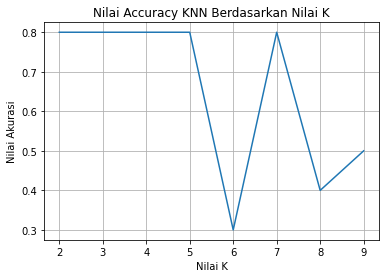

In [ ]:
import matplotlib.pyplot as plt

plt.plot(K_range, K_score)
plt.title('Nilai Accuracy KNN Berdasarkan Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Nilai Akurasi')
plt.grid(True)
plt.show()

# **K-Means Clustering**

K-Means merupakan salah satu algoritma clustering, dimana pada algoritma ini, komputer akan mengelompokkan sendiri data-data yang menjadi masukannya tanpa mengetahui terlebih dulu target kelasnya. 

Algoritma K-Means Clustering :
1. Pilih K buah titik centroid secara acak.
2. Kelompokkan data sehingga terbentuk K buah cluster dengan titik centroid dari setiap cluster merupakan titik centroid yang telah dipilih sebelumnnya.
3. Perbaharui nilai titik centroid.
4. Ulangi langkah 2 dan 3 sampai nilai dari titik centroid tidak lagi berubah

In [ ]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=2)
Kmeans = Kmeans.fit(dataTF)
pred = Kmeans.predict(dataTF)
centroids = Kmeans.cluster_centers_

In [ ]:
Kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Hasil kluster dengan menggunakan metode K-Means ialah sebagai berikut.

In [ ]:
dataTF['Cluster_Id'] = Kmeans.labels_
dataTF

,aksi,alih,anggar,antre,atas,bahan,bakar,bansos,bantu,baubau,...,udh,update,via,vivo,vs,warga,warna,yg,youtube,Cluster_Id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **UTS**

---


**PAGERANK**

Algoritma PageRank
<li>Inisialisasi PageRank setiap node dengan nilai 1
<li>Untuk setiap iterasi, perbarui PageRank setiap node dalam grafik
<li>PageRank baru adalah jumlah dari peringkat proporsional dari semua induk dari isi
<li>Terapkan jalan acak ke PageRank baru
<li>Nilai PageRank akan menyatu setelah iterasi yang cukup

**CRAWLING DATA BERITA DENGAN SCRAPI**

Berita adalah informasi baru atau informasi mengenai sesuatu yang sedang terjadi, disajikan lewat bentuk cetak, siaran, Internet, atau dari mulut ke mulut kepada orang ketiga atau orang banyak.

In [ ]:
!pip install scrapy
!pip install crochet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scrapy
from scrapy.crawler import CrawlerRunner
import re
from crochet import setup, wait_for
setup()

class QuotesToCsv(scrapy.Spider):
    name = "MJKQuotesToCsv"
    start_urls = [
        'https://bisnis.tempo.co/read/1643451/jumlah-penumpang-ojek-online-turun-karena-tarif-naik-berikut-data-lengkapnya',
    ]
    custom_settings = {
        'ITEM_PIPELINES': {
            '__main__.ExtractFirstLine': 1
        },
        'FEEDS': {
            'news.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }
    }

    def parse(self, response):
        """parse data from urls"""
        for quote in response.css('#isi > p'):
            yield {'news': quote.extract()}


class ExtractFirstLine(object):
    def process_item(self, item, spider):
        """text processing"""
        lines = dict(item)["news"].splitlines()
        first_line = self.__remove_html_tags__(lines[0])

        return {'news': first_line}

    def __remove_html_tags__(self, text):
        """remove html tags from string"""
        html_tags = re.compile('<.*?>')
        return re.sub(html_tags, '', text)

@wait_for(10)
def run_spider():
    """run spider with MJKQuotesToCsv"""
    crawler = CrawlerRunner()
    d = crawler.crawl(QuotesToCsv)
    return d

In [ ]:
run_spider()


It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting for information on how to handle this deprecation.


Mengambil dan Membaca data CSV yang bernama news.csv

In [ ]:
dataNews = pd.read_csv('news.csv')

PyPDF2 adalah pustaka PDF python murni gratis dan open-source yang mampu memisahkan, menggabungkan , memotong, dan mengubah halaman file PDF.

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import PyPDF2

Membaca Pdf dari file lalu dibuat menjadi bentuk document Text

In [ ]:
pdfReader = PyPDF2.PdfFileReader('/content/drive/MyDrive/webmining/beritabbm.pdf')
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()
document

'news\nTEMPO.CO,\nJakarta - Jumlah\npengguna jasa ojek\nonline (ojol)\nmengalami\npenurunan karena\nmasyarakat memilih\nmengurangi\npenggunaan\nlayanan transportasi\nonline tersebut dan\nberalih ke angkutan\nlainnya setelah\nadanya kenaikan\ntarif ojol per 11\nSeptember 2022. \nKetua Masyarakat\nTransportasi\nIndonesia (MTI)\nBidang Advokasi\ndan\nKemasyarakatan,\nDjoko Setijowarno,\nmenjelaskan\ndengan adanya\npemberlakuan tarif\nbaru, sebagian\npengguna jasa ojol\nmemang\nmengurangi\npenggunaan dan tak\nsedikit yang\nberpindah ke\nangkutan lain.\n“Penyesuaian\n[kenaikan] tarif ojol\nyang hampir\nbersamaan dengan\nkenaikan harga\nBBM cukup\ndirasakan oleh\nmasyarakat. Meski\nsebagian\nmasyarakat\nmemahami bahwa\nkenaikan tarif\nbertujuan untuk\nkesejahteraan\npengemudi,” kata\nDjoko melalui\nketerangan resmi\ndikutip, Minggu 9\nOktober 2022.'

PunktSentenceTokenizer adalah Sebuah tokenizer kalimat yang menggunakan algoritma tanpa pengawasan untuk membangun model untuk kata-kata singkatan, kolokasi, dan kata-kata yang memulai kalimat dan kemudian menggunakan model itu untuk menemukan batas kalimat.

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [ ]:
def tokenize(document):
    # Kita memecahnya menggunakan  PunktSentenceTokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    # sentences_list adalah daftar masing masing kalimat dari dokumen yang ada.
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [ ]:
sentences_list = tokenize(document)
sentences_list

['news\nTEMPO.CO,\nJakarta - Jumlah\npengguna jasa ojek\nonline (ojol)\nmengalami\npenurunan karena\nmasyarakat memilih\nmengurangi\npenggunaan\nlayanan transportasi\nonline tersebut dan\nberalih ke angkutan\nlainnya setelah\nadanya kenaikan\ntarif ojol per 11\nSeptember 2022.',
 'Ketua Masyarakat\nTransportasi\nIndonesia (MTI)\nBidang Advokasi\ndan\nKemasyarakatan,\nDjoko Setijowarno,\nmenjelaskan\ndengan adanya\npemberlakuan tarif\nbaru, sebagian\npengguna jasa ojol\nmemang\nmengurangi\npenggunaan dan tak\nsedikit yang\nberpindah ke\nangkutan lain.',
 '“Penyesuaian\n[kenaikan] tarif ojol\nyang hampir\nbersamaan dengan\nkenaikan harga\nBBM cukup\ndirasakan oleh\nmasyarakat.',
 'Meski\nsebagian\nmasyarakat\nmemahami bahwa\nkenaikan tarif\nbertujuan untuk\nkesejahteraan\npengemudi,” kata\nDjoko melalui\nketerangan resmi\ndikutip, Minggu 9\nOktober 2022.']

Merapikan data di atas sehingga lebih enak dibaca

In [ ]:
kal=1
for i in sentences_list:
    print('\nKalimat {}'.format(kal))
    kal+=1
    print(i)


Kalimat 1
news
TEMPO.CO,
Jakarta - Jumlah
pengguna jasa ojek
online (ojol)
mengalami
penurunan karena
masyarakat memilih
mengurangi
penggunaan
layanan transportasi
online tersebut dan
beralih ke angkutan
lainnya setelah
adanya kenaikan
tarif ojol per 11
September 2022.

Kalimat 2
Ketua Masyarakat
Transportasi
Indonesia (MTI)
Bidang Advokasi
dan
Kemasyarakatan,
Djoko Setijowarno,
menjelaskan
dengan adanya
pemberlakuan tarif
baru, sebagian
pengguna jasa ojol
memang
mengurangi
penggunaan dan tak
sedikit yang
berpindah ke
angkutan lain.

Kalimat 3
“Penyesuaian
[kenaikan] tarif ojol
yang hampir
bersamaan dengan
kenaikan harga
BBM cukup
dirasakan oleh
masyarakat.

Kalimat 4
Meski
sebagian
masyarakat
memahami bahwa
kenaikan tarif
bertujuan untuk
kesejahteraan
pengemudi,” kata
Djoko melalui
keterangan resmi
dikutip, Minggu 9
Oktober 2022.


Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
vectorizer = CountVectorizer()
cv_matrix=vectorizer.fit_transform(sentences_list)

Menampilkan jumlah Kosa Kata dari Data

In [ ]:
print ("Banyaknya kosa kata = ", len((vectorizer.get_feature_names_out())))

Banyaknya kosa kata =  74


Menampilkan jumlah Kalimat dari Data

In [ ]:
print ("Banyaknya kalimat = ", (len(sentences_list)))

Banyaknya kalimat =  4


Menampilkan Kosa Kata dari Data

In [ ]:
print ("kosa kata = ", (vectorizer.get_feature_names_out()))

kosa kata =  ['11' '2022' 'adanya' 'advokasi' 'angkutan' 'bahwa' 'baru' 'bbm' 'beralih'
 'berpindah' 'bersamaan' 'bertujuan' 'bidang' 'co' 'cukup' 'dan' 'dengan'
 'dikutip' 'dirasakan' 'djoko' 'hampir' 'harga' 'indonesia' 'jakarta'
 'jasa' 'jumlah' 'karena' 'kata' 'ke' 'kemasyarakatan' 'kenaikan'
 'kesejahteraan' 'keterangan' 'ketua' 'lain' 'lainnya' 'layanan'
 'masyarakat' 'melalui' 'memahami' 'memang' 'memilih' 'mengalami'
 'mengurangi' 'menjelaskan' 'meski' 'minggu' 'mti' 'news' 'ojek' 'ojol'
 'oktober' 'oleh' 'online' 'pemberlakuan' 'pengemudi' 'pengguna'
 'penggunaan' 'penurunan' 'penyesuaian' 'per' 'resmi' 'sebagian' 'sedikit'
 'september' 'setelah' 'setijowarno' 'tak' 'tarif' 'tempo' 'tersebut'
 'transportasi' 'untuk' 'yang']


In [ ]:
# mengubah kumpulan dokumen mentah menjadi matriks fitur TF-IDF
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.18019447 0.14206739 0.14206739 0.         0.14206739 0.
  0.         0.         0.18019447 0.         0.         0.
  0.         0.18019447 0.         0.14206739 0.         0.
  0.         0.         0.         0.         0.         0.18019447
  0.14206739 0.18019447 0.18019447 0.         0.14206739 0.
  0.11501579 0.         0.         0.         0.         0.18019447
  0.18019447 0.09403295 0.         0.         0.         0.18019447
  0.18019447 0.14206739 0.         0.         0.         0.
  0.18019447 0.18019447 0.23003159 0.         0.         0.36038894
  0.         0.         0.14206739 0.14206739 0.18019447 0.
  0.18019447 0.         0.         0.         0.18019447 0.18019447
  0.         0.         0.09403295 0.18019447 0.18019447 0.14206739
  0.         0.        ]
 [0.         0.         0.15492581 0.19650374 0.15492581 0.
  0.19650374 0.         0.         0.19650374 0.         0.
  0.19650374 0.         0.         0.30985162 0.15492581 0.
  0.         0.15492581 0. 

Menampilkan Jumlah Kalimat dan Kosa Kata

In [ ]:
normal_matrix.shape

(4, 74)

NetworkX adalah paket Python untuk pembuatan, manipulasi, dan studi tentang struktur, dinamika, dan fungsi jaringan yang kompleks. Ini menyediakan:

In [ ]:
import networkx as nx

Graph adalah kumpulan dati titik (node) dan garis dimana pasangan – pasangan titik (node) tersebut dihubungkan oleh segmen garis. Node ini biasa disebut simpul (vertex) dan segmen garis disebut ruas (edge)

In [ ]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 3)	0.069147241220448
  (0, 2)	0.11393531499207227
  (0, 1)	0.2682359356722028
  (0, 0)	1.0
  (1, 3)	0.08566890097986171
  (1, 0)	0.2682359356722028
  (1, 2)	0.12544493717554261
  (1, 1)	1.0
  (2, 3)	0.0964040881534787
  (2, 0)	0.11393531499207227
  (2, 2)	0.9999999999999994
  (2, 1)	0.12544493717554261
  (3, 2)	0.0964040881534787
  (3, 1)	0.08566890097986171
  (3, 0)	0.069147241220448
  (3, 3)	1.0


In [ ]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

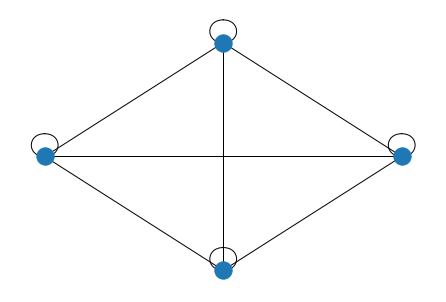

In [ ]:
nx.draw_circular(nx_graph)

Jumlah Banyak Sisi 

In [ ]:
print('Banyaknya sisi {}'.format(nx_graph.number_of_edges()))

Banyaknya sisi 10


Menkalikan data dengan data Transpose

In [ ]:
res_graph = normal_matrix * normal_matrix.T

PageRank menghitung peringkat node dalam grafik G berdasarkan struktur tautan masuk. Awalnya dirancang sebagai algoritma untuk menentukan peringkat halaman web.

In [ ]:
ranks=nx.pagerank(nx_graph,)

memasukkan data ke array

In [ ]:
arrRank=[]
for i in ranks:
    arrRank.append(ranks[i])

menjadikan data kedalam bentuk tabel lalu digabungkan 

In [ ]:
dfRanks = pd.DataFrame(arrRank,columns=['PageRank'])
dfSentence = pd.DataFrame(sentences_list,columns=['News'])
dfJoin = pd.concat([dfSentence,dfRanks], axis=1)
dfJoin

,News,PageRank
0,"news\nTEMPO.CO,\nJakarta - Jumlah\npengguna ja...",0.257394
1,Ketua Masyarakat\nTransportasi\nIndonesia (MTI...,0.261458
2,“Penyesuaian\n[kenaikan] tarif ojol\nyang hamp...,0.244738
3,Meski\nsebagian\nmasyarakat\nmemahami bahwa\nk...,0.236410


Mengurutkan data berdasarkan hasil tertinggi

In [ ]:
sortSentence=dfJoin.sort_values(by=['PageRank'],ascending=False)
sortSentence

,News,PageRank
1,Ketua Masyarakat\nTransportasi\nIndonesia (MTI...,0.261458
0,"news\nTEMPO.CO,\nJakarta - Jumlah\npengguna ja...",0.257394
2,“Penyesuaian\n[kenaikan] tarif ojol\nyang hamp...,0.244738
3,Meski\nsebagian\nmasyarakat\nmemahami bahwa\nk...,0.236410


Menampilkan data dari 5 ke atas

In [ ]:
sortSentence.head(5)

,News,PageRank
1,Ketua Masyarakat\nTransportasi\nIndonesia (MTI...,0.261458
0,"news\nTEMPO.CO,\nJakarta - Jumlah\npengguna ja...",0.257394
2,“Penyesuaian\n[kenaikan] tarif ojol\nyang hamp...,0.244738
3,Meski\nsebagian\nmasyarakat\nmemahami bahwa\nk...,0.236410


**KMEANS KANJURUHAN**

melakukan crawling data twitter dengan hastag yang sedang viral di twitter yaitu #tragedi kanjuruhan.

In [ ]:
c = twint.Config()
c.Search = '#tragedi kanjuruhan'
c.Lang = "in"
c.Pandas = True
c.Limit = 60
twint.run.Search(c)

1590832038093152257 2022-11-10 22:21:28 +0000 <beembooss> Selamat atas terpilihnya ketua parlemen itaewon yang baru.  Ttd : Warga kanjuruhan dan sekitarnya.  #Tragedi  https://t.co/p4jxxdthQx
1590794681994334208 2022-11-10 19:53:02 +0000 <wahananewsdotco> Korban Tragedi Kanjuruhan Turun ke Jalan Pakai Kursi Roda demi Keadilan  https://t.co/EeHaUkn4jg #AksiDemonstrasi #Aremania #AremaFc #Tragedi
1589945520017248256 2022-11-08 11:38:46 +0000 <PemkotMalang> Sebagai bagian kepedulian, empati dan duka mendalam atas #TragediKanjuruhan Jajaran Pemkot Malang diinstruksikan mengenakan pakaian bernuansa hitam demi mengenang #40HariKanjuruhan pada Rabu-Kamis, 9-10 Nopember 2022.  #Arema #Aremania #Malang #Kanjuruhan #Tragedi  https://t.co/DMbhi3uTt3
1588461827100676096 2022-11-04 09:23:06 +0000 <KompastvJatim> Dari Itaewon hingga Kanjuruhan, Ini 5 Tragedi Kerumunan Paling Mematikan di Dunia #itaewon #kanjuruhan #gujarat #tragedi #mina #kerumunan #india #pantaigading #viral  https://t.co/KPhXo27aU

In [ ]:
# membuat tabelnya terlebih dahulu.
Tweets_df = twint.storage.panda.Tweets_df

In [ ]:
#mengeksport ke dalam file berekstensi csv.
Tweets_df["tweet"].to_csv("kanjuruhan.csv",index=False)

melakukan preprocessing data mulai dari pembersihan case folding, remove text special, remove number, remove tanda baca, remove white space, remove single karakter, tokenizing, dan tf

In [ ]:
import pandas as pd 
import numpy as np
tweets = pd.read_csv("kanjuruhan.csv")
tweets['tweet'] = tweets['tweet'].str.lower()

import re
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
    return text
tweets['tweet'] = tweets['tweet'].apply(remove_tweet_special)

import string
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
tweets['tweet'] = tweets['tweet'].apply(remove_punctuation)

def remove_whitespace_LT(text):
    return text.strip()
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)   
tweets['tweet'] = tweets['tweet'].apply(remove_whitespace_LT)
tweets['tweet'] = tweets['tweet'].apply(remove_whitespace_multiple)

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
tweets['tweet'] = tweets['tweet'].apply(remove_singl_char)
# menghapus baris yg kosong
tweets = tweets [ ~(tweets["tweet"] =="")]

def remove_number(text):
    return  re.sub(r"\d+", "", text)
tweets['tweet'] = tweets['tweet'].apply(remove_number)

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)
tweets['tweet'] = tweets['tweet'].apply(word_tokenize_wrapper)
tweets.head(5)

tweets['tweet'].to_csv("data.csv", index=False)
tweets.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet
0,"[selamat, atas, terpilihnya, ketua, parlemen, ..."
1,"[korban, tragedi, kanjuruhan, turun, ke, jalan..."
2,"[sebagai, bagian, kepedulian, empati, dan, duk..."
3,"[dari, itaewon, hingga, kanjuruhan, ini, trage..."
4,"[setelah, dirawat, satu, bulan, satu, pasien, ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#Membuat Dataframe
dataTextPre = pd.read_csv('data.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])
dataTextPre

,tweet
0,"['selamat', 'atas', 'terpilihnya', 'ketua', 'p..."
1,"['korban', 'tragedi', 'kanjuruhan', 'turun', '..."
2,"['sebagai', 'bagian', 'kepedulian', 'empati', ..."
3,"['dari', 'itaewon', 'hingga', 'kanjuruhan', 'i..."
4,"['setelah', 'dirawat', 'satu', 'bulan', 'satu'..."
5,"['ekshumasi', 'korban', 'tragedi', 'kanjuruhan..."
6,['hiau']
7,"['siapa', 'tersangka', 'baru', 'tragedi', 'kan..."
8,"['ketum', 'pssi', 'absen', 'pemeriksaan', 'sak..."
9,"['ribuan', 'aremania', 'turun', 'ke', 'jalan',..."


In [ ]:
matrik_vsm=bag.toarray()
matrik_vsm.shape

(33, 241)

In [ ]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
a=vectorizer.get_feature_names()
print(len(matrik_vsm[:,1]))
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF.to_csv('dataTF.csv',index=False)
dataTF

33


,abdul,absen,air,akan,ali,alibi,anda,andi,antara,apa,...,untuk,update,waktu,warga,wong,ya,yaaa,yang,yg,youtube
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


K means clustering merupakan metode algoritma dasar,yang diterapkan sebagai berikut

Menentukan jumlah cluster
Secara acak mendistribusikan data cluster
Menghitung rata rata dari data yang ada di cluster.
Menggunakan langkah baris 3 kembali sesuai nilai treshold
Menghitung jarak antara data dan nilai centroid(K means clustering)
Distance space dapat diimplementasikan untuk menghitung jarak data dan centroid. Contoh penghitungan jarak yang sering digunakan adalah manhattan/city blok distance

In [ ]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=2)
Kmeans = Kmeans.fit(dataTF)
pred = Kmeans.predict(dataTF)
centroids = Kmeans.cluster_centers_

In [ ]:
dataTF['Cluster_Id'] = Kmeans.labels_
dataTF

,abdul,absen,air,akan,ali,alibi,anda,andi,antara,apa,...,update,waktu,warga,wong,ya,yaaa,yang,yg,youtube,Cluster_Id
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Topik Modelling Dengan Latent Semantic Analysis (LSA)
Dalam pembahasan kali ini, kita akan fokus pada Latent Semantic Indexing (LSI) atau Latent Semantic Analysis (LSA) dan melakukan topik modelling menggunakan Scikit-learn.

## **Topik Modelling**
Topik Modelling ialah teknik tanpa pengawasan untuk menemukan tema dokumen yang diberikan. Ini mengekstrak kumpulan kata kunci yang terjadi bersama. Kata kunci yang muncul bersama ini mewakili sebuah topik. Misalnya, saham, pasar, ekuitas, reksa dana akan mewakili topik 'investasi saham'.

## **Latent Semantic Indexing (LSI) atau Latent Semantic Analysis (LSA)**
Latent Semantic Indexing (LSI) atau Latent Semantic Analysis (LSA) adalah teknik untuk mengekstrak topik dari dokumen teks yang diberikan. Ini menemukan hubungan antara istilah dan dokumen. Konsep LSI digunakan dalam pengelompokan dokumen, pencarian informasi, dan mesin rekomendasi. LSI menemukan topik laten menggunakan Dekomposisi Nilai Singular. Untuk meelakukan LSA dapat dilakukan dengan mengikuti tahapan tahapan berikut.

## **Meload Dokumen**
Setelah tahapan mengambil dokumen selesai, selanjutnya meload dokumen yang sudah didapatkan. Untuk dapat meload dokumen kita gunakan library os dan pandas seperti berikut.

In [ ]:
import os
import pandas as pd

# Load Dataset
documents_list = []
with open( os.path.join("news.csv") ,"r") as fin:
    for line in fin.readlines():
        text = line.strip()
        documents_list.append(text)

## **Membuat Fitur TF-IDF**
Setelah berhasil meload dokumen langkah selanjutnya ialah mengenerate fitur TF-IDF pada dokumen. Pada proses ini juga dilakukan operasi prepocessing, yaitu case folding, stopword, dan tokenizing. Untuk melakukan proses ini dengan menggunakan RegexpTokenizer dari library nltk seperti source code berikut.

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
train_data = tfidf.fit_transform(documents_list)  
train_data

<16x257 sparse matrix of type '<class 'numpy.float64'>'
	with 396 stored elements in Compressed Sparse Row format>

## **Membuat Matrik SVD**
Matrik SVD adalah teknik dekomposisi matriks yang memfaktorkan matriks dalam produk matriks. Untuk dapat membuat matrik tersebut kita dapat menggunakan TruncatedSVD dari library sklearn seperti berikut.

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Define the number of topics or components
num_components=12

# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

# Fit SVD model on data
lsa.fit_transform(train_data)

# Get Singular values and Components 
Sigma = lsa.singular_values_  
V_transpose = lsa.components_.T
V_transpose

array([[ 0.04211465, -0.0492938 , -0.01031915, ..., -0.01214861,
        -0.04246847,  0.15754496],
       [ 0.0947882 , -0.05170534, -0.01228227, ...,  0.00942341,
        -0.02253914, -0.00832247],
       [ 0.08842437, -0.08341448, -0.00659537, ..., -0.00381237,
        -0.08494276,  0.04941909],
       ...,
       [ 0.03635279, -0.02781845,  0.01222149, ..., -0.00856808,
         0.01489179,  0.01512623],
       [ 0.02768269,  0.01896092, -0.01871718, ..., -0.04650898,
         0.0809907 , -0.00657513],
       [ 0.10030895,  0.05269577, -0.04557111, ...,  0.04649464,
        -0.05714591,  0.02410281]])

## **Ekstrak topik dan istilah**
Setelah membuar matriks SVD, Selanjutnya kita perlu mengekstrak topik dari matriks komponen SVD dengan source code seperti berikut. 

In [ ]:
# Print the topics with their terms
terms = tfidf.get_feature_names()

for index, component in enumerate(lsa.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['persen', 'dan', 'ojol', 'dari', 'online']
Topic 1:  ['tarif', 'kenaikan', 'penurunan', 'ojol', 'masyarakat']
Topic 2:  ['news', 'di', 'berita', 'google', 'ikuti']
Topic 3:  ['pekerjaan', 'baca', 'swasta', 'sampingan', 'berapa']
Topic 4:  ['pengemudi', 'penyesuaian', 'bahwa', 'dari', 'lebih']
Topic 5:  ['ada', 'listrik', 'mau', 'motor', 'syarat']
Topic 6:  ['pengguna', 'sebagai', '40', 'didominasi', 'pria']
Topic 7:  ['news', 'berdampak', 'besar', 'cenderung', 'dampak']
Topic 8:  ['000', 'lebih', 'kebanyakan', 'rp25', 'berapa']
Topic 9:  ['news', 'kenaikan', 'berapa', 'bumn', 'hingga']
Topic 10:  ['kenaikan', 'responden', 'memilih', '57', '2022']
Topic 11:  ['news', '59', '6', '93', 'aplikasi']


## Ensemble BaggingClassifier dengan Metode DecisionTreeClassifier 

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = X_train
Y = y_train

base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
						n_estimators = num_trees)

results = model_selection.cross_val_score(model, X, Y)
print("accuracy :")
print(results.mean())


accuracy :
0.55


## Ensemble BaggingClassifier dengan Metode SVC 

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import pandas as pd

X = X_train
Y = y_train

# initialize the base classifier
base_cls = SVC()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
						n_estimators = num_trees)

results = model_selection.cross_val_score(model, X, Y)
print("accuracy :")
print(results.mean())


accuracy :
0.43


## Ensemble RandomForestClassifier dengan GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
# 'n_estimators': [i for i in range(800)],
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 50}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='entropy')
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=42)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
clf.fit(X_train, y_train).score(X_test, y_test)



0.8

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

# from sklearn.tree import DecisionTreeClassifier

estimators = [('rf', RandomForestClassifier(max_depth=2, random_state=0)),('rf1', RandomForestClassifier(max_depth=2, random_state=0)),('rf2', RandomForestClassifier(max_depth=2, random_state=0)),('rf3', RandomForestClassifier(max_depth=2, random_state=0))]
clf = StackingClassifier(estimators=estimators, final_estimator=GaussianNB())
from sklearn.model_selection import train_test_split
print("accuracy :")
clf.fit(X_train, y_train).score(X_test, y_test)

accuracy :


0.8